In [44]:
import pandas as pd
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error, r2_score 

from sklearn.model_selection import train_test_split


In [13]:
df=pd.read_csv("winequality-red.csv", sep=";")
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [14]:
X=df.drop(['fixed acidity'], axis=1).values

y=df['quality'].values


In [15]:
X_fa=X[:,0]
print(y.shape, X_fa.shape)


(1599,) (1599,)


In [16]:
X_fa=X_fa.reshape(-1,1)
print(X_fa.shape)

(1599, 1)


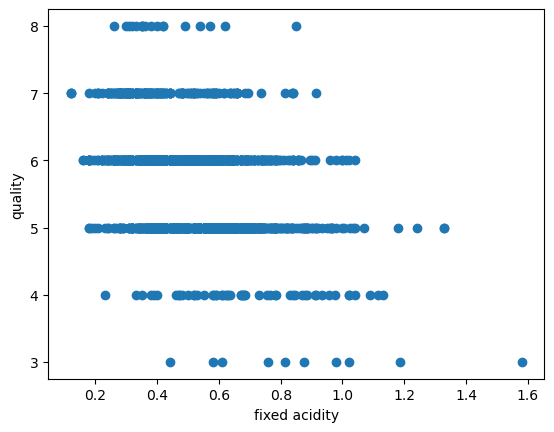

In [17]:
import matplotlib.pyplot as plt
plt.scatter(X_fa, y)

plt.xlabel("fixed acidity")
plt.ylabel("quality")
plt.show()


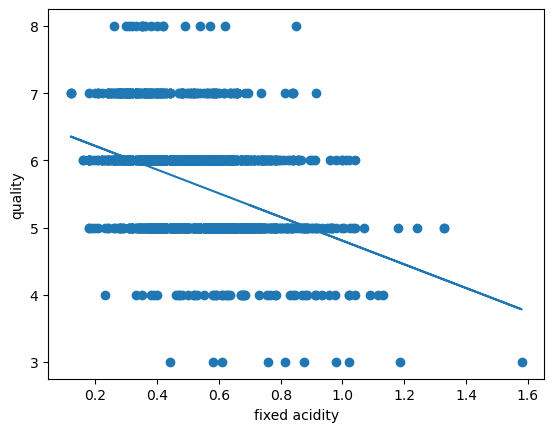

In [18]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_fa, y)

predictions = reg.predict(X_fa)

plt.scatter(X_fa, y)

plt.plot(X_fa, predictions)

plt.xlabel("fixed acidity")
plt.ylabel("quality")
plt.show()


In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)
reg_all = LinearRegression()
reg_all.fit(X_train, y_train)
y_pred = reg_all.predict(X_test)

In [20]:
reg_all.score(X_test,y_test)

1.0

In [21]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred, squared=False)

D:\anaconda\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


3.3296512139060804e-15

In [34]:
r2 = r2_score(y_test, y_pred)
print(f"R^2 Score: {r2:.2f}")

R^2 Score: 1.00


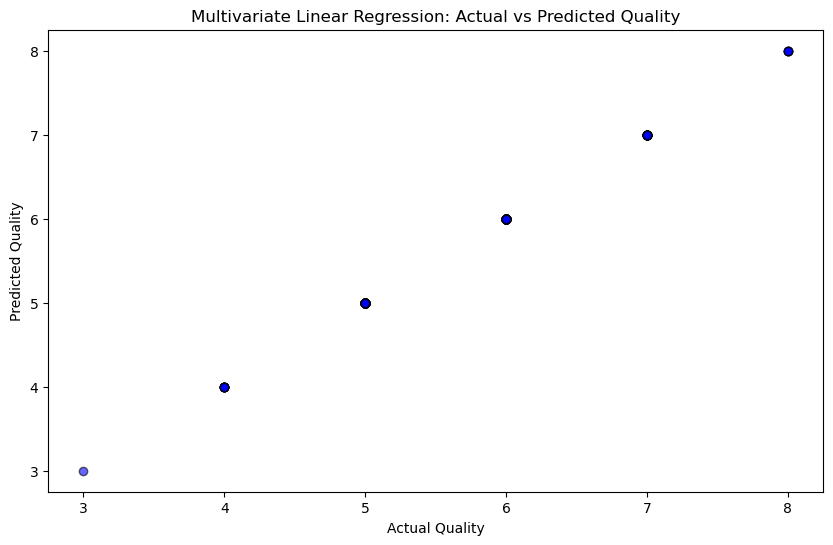

In [38]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', edgecolor='k', alpha=0.6)
plt.xlabel('Actual Quality')
plt.ylabel('Predicted Quality')
plt.title('Multivariate Linear Regression: Actual vs Predicted Quality')
plt.show()

In [46]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

In [50]:
X = df.drop('quality', axis=1) 
y = df['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [52]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [56]:
lasso = Lasso(alpha=0.1, random_state=42)
lasso.fit(X_train_scaled, y_train)

Lasso(alpha=0.1, random_state=42)

In [58]:
feature_importance = pd.Series(lasso.coef_, index=X.columns)
important_features = feature_importance[feature_importance != 0]

In [68]:
important_features = important_features.abs().sort_values(ascending=False)

print("Important features identified:")
print(important_features)

Important features identified:
alcohol             0.265115
volatile acidity    0.148541
sulphates           0.027212
dtype: float64


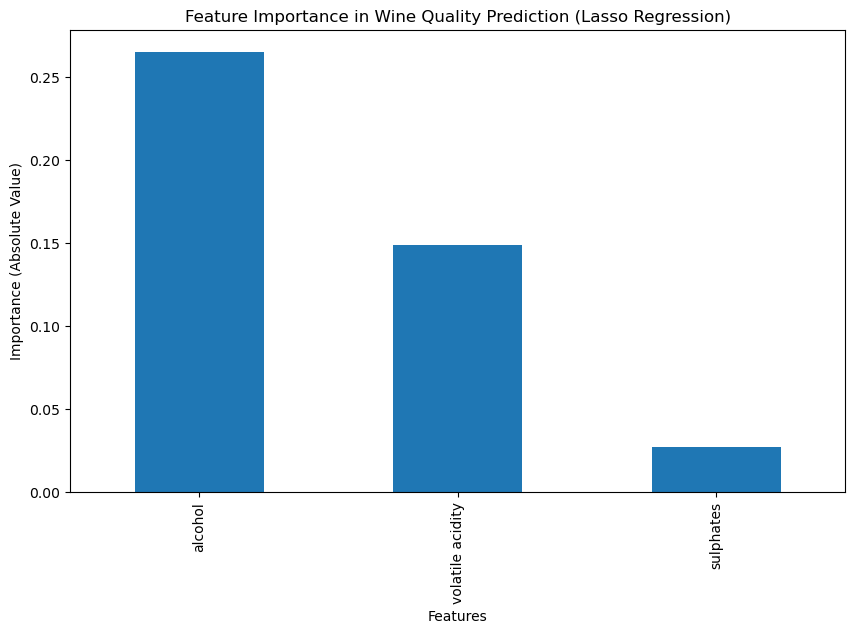

In [72]:
plt.figure(figsize=(10, 6))
important_features.plot(kind='bar')
plt.xlabel('Features')
plt.ylabel('Importance (Absolute Value)')
plt.title('Feature Importance in Wine Quality Prediction (Lasso Regression)')
plt.show()